# Импорт библиотект и данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel('data/Сводный отчет за декабрь.xlsx', header=1)


# Отсеиванине ненужных данных и агрегация оставшихся по дням

In [2]:
if 'Название ККТ' in data.columns:
    # выберем данные с одной точки
    data = data[data['Название ККТ'] == 'ТРЦ "Фокус"']
    # выберем только данные прихода
    data = data[data['Тип операции'] == 'Приход']
    data['t'] = data['Дата и время'].apply(lambda x: x.day)

    data.drop(columns=['Тип операции', 'Наличными', 'Безналичными', 'Название ККТ', 'Дата и время'], inplace=True)
    data.rename(columns = {
        'Сумма': 'Y(t)'
    }, inplace=True)
df = data.groupby(['t']).sum()
df.reset_index(inplace=True)
df.head()

,t,Y(t)
0,1,590.0
1,2,19900.0
2,3,16200.0
3,4,2570.0
4,5,7330.0


# Расчет параметров, определение аномалий, вывод графика с выделенными значениями анномалий

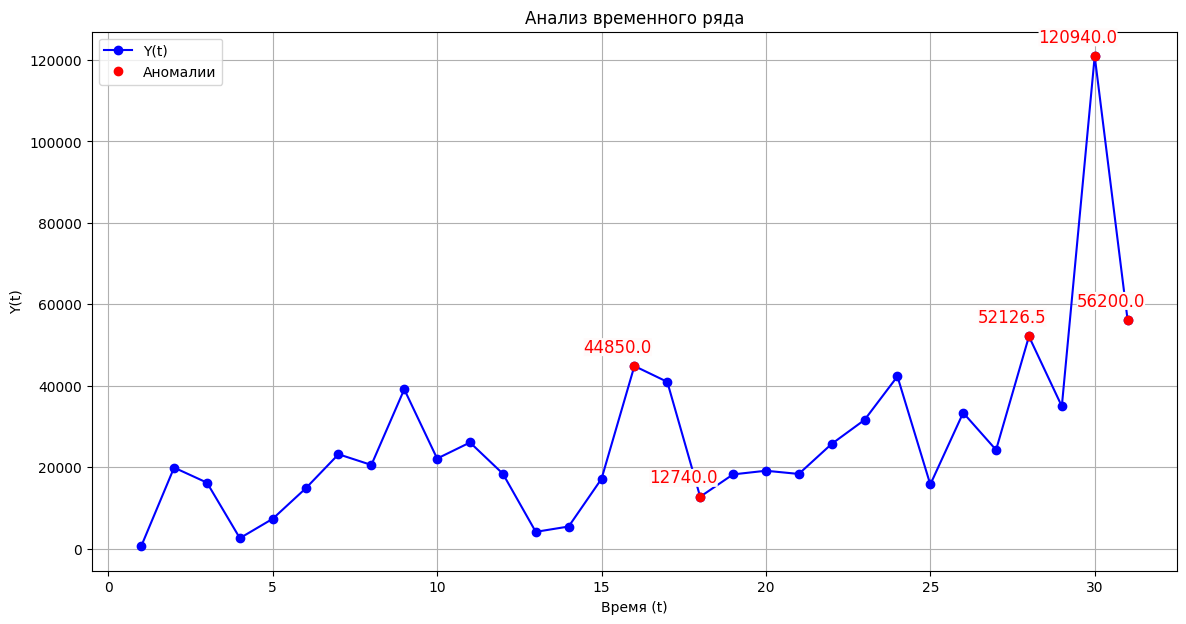

In [3]:
mean_y = df['Y(t)'].mean()
std_dev = df['Y(t)'].std(ddof=1)  # Using Bessel's correction with ddof=1

# Adding a new column to DataFrame for the difference between each observation and the mean (Y(t) - Yср)
df['Y(t) - Yср'] = df['Y(t)'] - mean_y

# Calculate λt for t=2,3,...n (as t=1 does not have a previous value)
df['λt'] = df['Y(t)'].diff().abs() / std_dev

lambda_alpha_30 = 1.2
lambda_alpha_50 = 1.1
lambda_alpha = lambda_alpha_30 - ((30 - 34) / (50 - 30)) * (lambda_alpha_30 - lambda_alpha_50)



df['λt'] = df['Y(t)'].diff().abs() / std_dev

df['Anomaly'] = df['λt'] > lambda_alpha


# Построение графика с указанием аномалий и значений этих аномалий

plt.figure(figsize=(14, 7))
# Отрисовка основной линии временного ряда
plt.plot(df['t'], df['Y(t)'], marker='o', linestyle='-', color='blue', label='Y(t)')

# Выделение аномалий
for index, row in df[df['Anomaly']].iterrows():
    plt.annotate(f"{row['Y(t)']}", # Текст аннотации - значение Y(t)
                (row['t'], row['Y(t)']), # Координаты точки, которую аннотируем
                textcoords="offset points", # Как интерпретировать координаты
                xytext=(-12,10), # Смещение метки аннотации
                ha='center', # Горизонтальное выравнивание текста
                color='r',
                fontsize = 12,
                bbox=dict(boxstyle="round,pad=0",
                      fc="snow", lw=0)) # Цвет текста

# Обозначение аномалий красными точками
plt.plot(df[df['Anomaly']]['t'], df[df['Anomaly']]['Y(t)'], 'or', label='Аномалии')

# Добавление заголовка и подписей осей
plt.title('Анализ временного ряда')
plt.xlabel('Время (t)')
plt.ylabel('Y(t)')
plt.grid(True)
plt.legend()

# Отображение графика с аномалиями
plt.show()

sum_squared_diff = ((df['Y(t)'] - mean_y)**2).sum()
variance_y = sum_squared_diff / (df['t'].count() - 1)
std_dev_y = np.sqrt(variance_y)



# Также выведем таблицу с подсчитанными параметрами

In [4]:
display(df)
print(f'{mean_y=:.0f}, {std_dev=:.0f}, {std_dev_y=:.0f}')

,t,Y(t),Y(t) - Yср,λt,Anomaly
0,1,590.0,-26151.5,NaN,False
1,2,19900.0,-6841.5,0.860187,False
2,3,16200.0,-10541.5,0.164821,False
3,4,2570.0,-24171.5,0.607165,False
4,5,7330.0,-19411.5,0.212040,False
5,6,14780.0,-11961.5,0.331869,False
6,7,23180.0,-3561.5,0.374188,False
7,8,20550.0,-6191.5,0.117157,False
8,9,39130.0,12388.5,0.827669,False
9,10,22120.0,-4621.5,0.757731,False


mean_y=26742, std_dev=22449, std_dev_y=22449
